In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# f(x) = 2^x - x^2
# Найти экстремум функции, точность принять равную ε=0.01

In [ ]:
def f(x):
    return 2**x - x**2

EPS = 0.01
y = np.arange(-4, 6, 0.1)
x = np.array([f(i) for i in y])
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
print(df.describe())

: 

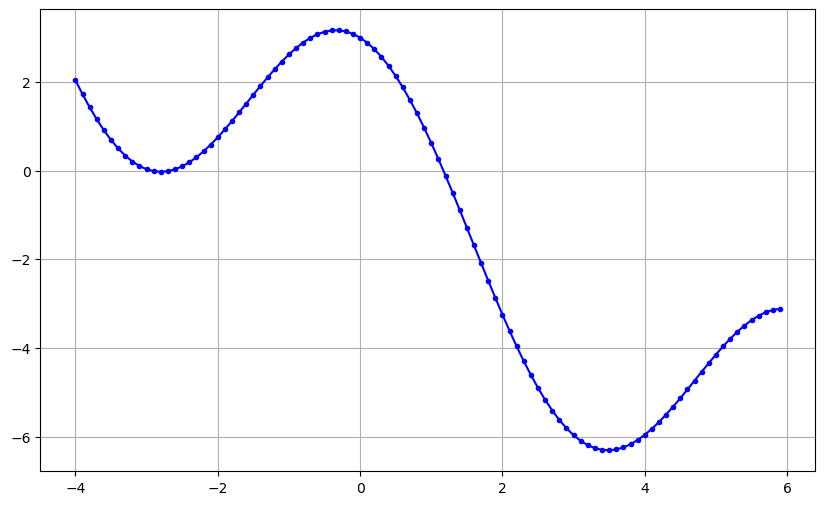

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(y, x, marker="o", label="f(x)", color="blue", markersize=3)
plt.title("График функции f(x) = 2^x - x^2")
plt.xlabel("y")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
%%sql


In [44]:
# Начальные параметры
EPS = 0.01
x1 = 100
x2 = 200
mid = 100
a = 2  # Левый конец интервала
b = 4  # Правый конец интервала
count = 0  # Счетчик итераций

while (np.abs(x1 - x2) > EPS) and count <= 10:
    mid = (a + b) / 2  # Середина интервала
    x1 = mid - EPS
    x2 = mid + EPS
    f1 = f(x1)  # Вычисляем значение функции в x1
    f2 = f(x2)  # Вычисляем значение функции в x2
    
    if f1 < f2:  # Сравниваем значения функции
        b = x2  # Обновляем правый конец
    else:
        a = x1  # Обновляем левый конец
    count += 1  # Увеличиваем счетчик итераций

print(f"Найденное значение: x = {mid}")

3.4804980468749998


# f(x,y)=yxcos(x)
# Найти экстремум функции, точность принять равную ε=0.01

In [ ]:
# Определяем функцию
def f(x, y):
    return y**x * np.cos(x)

# Градиенты функции
def gradient_f(x, y):
    df_dx = y**x * (np.log(y) * np.cos(x) - np.sin(x))
    df_dy = x * y**(x-1) * np.cos(x)
    return np.array([df_dx, df_dy])

# Метод градиентного спуска для поиска экстремума
def gradient_descent(start_x, start_y, lr=0.01, epsilon=0.01, max_iter=100):
    x, y = start_x, start_y
    for i in range(max_iter):
        grad = gradient_f(x, y)
        x, y = x - lr * grad[0], y - lr * grad[1]
        if np.linalg.norm(grad) < epsilon:
            print(f"Сошлось за {i+1} итераций: x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")
            break
        print(f"Итерация {i+1}: x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")
    return x, y



In [ ]:
# Начальные значения
start_x, start_y = 1, 2  # Стартовые точки
lr = 0.01  # Скорость обучения
epsilon = 0.01  # Точность
max_iter = 100  # Максимальное количество итераций

# Поиск экстремума
opt_x, opt_y = gradient_descent(start_x, start_y, lr, epsilon, max_iter)

In [ ]:
# Построение трехмерного графика функции
x = np.linspace(-2, 2, 100)
y = np.linspace(1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(opt_x, opt_y, f(opt_x, opt_y), color='red', s=50, label='Найденный экстремум')
ax.set_title('График функции f(x, y) = y^x * cos(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()